# Prueba Intertrimestral

Nombre y Apellidos:

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [61]:
import pandas as pd
import numpy as np
from datetime import date
import pandas as pd
import numpy as np
import sklearn.datasets 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)
from sklearn.linear_model import ElasticNet
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import cmath
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, 
                             roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error, 
                             mean_absolute_percentage_error, silhouette_score, r2_score, davies_bouldin_score, 
                             adjusted_rand_score)
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer, load_wine, load_diabetes

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [14]:
def logistica(r, xn):

    return r * xn * (1 - xn)


In [3]:
r = 3.5  
xn = 0.5  

xn1 = mapa_logistico(r, xn)
print(f'El valor de la siguiente iteración es: {xn1}')


El valor de la siguiente iteración es: 0.875


b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [15]:
def generar_iteraciones(r, xn, n):

    iteraciones = [xn]
    for i in range(n):
        xn = logistica(r, xn)
        iteraciones.append(xn)
    return iteraciones


In [7]:
listaNumeros(0.2,10)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [18]:
import pandas as pd

def generar_dataframe(r_values, x0, n):
    data = []
    for r in r_values:
        xn = x0
        for i in range(n):
            xn = logistica(r, xn)
            data.append([r, i+1, xn])
    
    df = pd.DataFrame(data, columns=['r', 'n', 'xn+1'])
    return df

r_values = [i * 0.25 for i in range(17)]
x0 = 0.2
n = 100

df = generar_dataframe(r_values, x0, n)

print(df.head(10))


     r   n  xn+1
0  0.0   1   0.0
1  0.0   2   0.0
2  0.0   3   0.0
3  0.0   4   0.0
4  0.0   5   0.0
5  0.0   6   0.0
6  0.0   7   0.0
7  0.0   8   0.0
8  0.0   9   0.0
9  0.0  10   0.0


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [95]:
class Numero:
    def __init__(self, r, xn):
        """Inicializa un coche con marca, modelo y año."""
        self.r=r
        self.xn=xn
    
    def logistica(self):
        return r * xn * (1 - xn)
    
    def info(self):
        """Devuelve la información del coche."""
        return f"{self.r} y {self.xn}"

In [96]:
prueba=Numero(0.3,5)

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [22]:
import pandas as pd
import os

def leer_archivo_como_dataframe(ruta_archivo):
    _, extension = os.path.splitext(ruta_archivo)
    
    try:
        if extension == '.csv':
            df = pd.read_csv(ruta_archivo)
        elif extension in ['.xls', '.xlsx']:
            df = pd.read_excel(ruta_archivo)
        elif extension == '.json':
            df = pd.read_json(ruta_archivo)
        elif extension == '.parquet':
            df = pd.read_parquet(ruta_archivo)
        else:
            raise ValueError(f"Formato de archivo '{extension}' no soportado.")
        
        print(f"Archivo '{ruta_archivo}' leído correctamente.")
        return df
    
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return None

Podemos ver que las variables que hay son:

1. Store: es el id de la tienda
2. Fecha: fecha (podemos ver que siempre es por semanas (siempre en viernes)
3. Weekly_Sales: compras de esa tienda en la semana
4. Holday_Flag: si es un día festivo o no.
5. Temperature: temperatura
6. Fuel_Price: precio de la gasolina
7. CPI: Consumer Price Index
8. Unemployment: la tasa de desempleo que existe

In [23]:
df=leer_archivo_como_dataframe("Walmart.csv")

Archivo 'Walmart.csv' leído correctamente.


In [24]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [25]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6434.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999047
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.876012
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [64]:
def describirDataset(df):
    print(df.isna().sum())
    print(df.dtypes)
    print(df.describe())
describirDataset(df)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object
             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6434.000000                           6434  6.434000e+03   6434.000000   
mean     22.996581  2011-06-16 22:10:19.956481280  1.047016e+06      0.069941   
min       1.000000            2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-08 00:00:00  5.531677e+05      0.000000   
50%      23.000000            2011-06-17 00:00:00  9.608457e+05      0.000000   
75%      34.000000            2012-02-24 00:00:00  1.420282e+06      0.000000   
max      45.00

In [26]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64

Propongo eliminarlos usando la siguiente función ya que es uno y no se pierde casi información.

In [27]:
import pandas as pd

def eliminar_nan(df, modo='filas'):

    if modo == 'filas':
        df_limpio = df.dropna()
        print("Filas con NaN eliminadas.")
    elif modo == 'columnas':
        df_limpio = df.dropna(axis=1)
        print("Columnas con NaN eliminadas.")
    else:
        raise ValueError("Modo no válido. Usa 'filas' o 'columnas'.")
    
    return df_limpio


In [28]:
df=eliminar_nan(df)

Filas con NaN eliminadas.


In [29]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



In [37]:
import pandas as pd
import matplotlib.pyplot as plt


numero_tiendas = df['Store'].nunique()
print(f"Número de tiendas: {numero_tiendas}")



Número de tiendas: 45


In [38]:
ventas_promedio = df.groupby('Store')['Weekly_Sales'].mean().sort_values()


In [40]:
tienda_mas_baja = ventas_promedio.idxmin()
venta_mas_baja = ventas_promedio.min()
tienda_mas_alta = ventas_promedio.idxmax()
venta_mas_alta = ventas_promedio.max()


In [41]:

print(f"Tienda con ventas promedio más bajas: Tienda {tienda_mas_baja} con ventas de {venta_mas_baja:.2f}")
print(f"Tienda con ventas promedio más altas: Tienda {tienda_mas_alta} con ventas de {venta_mas_alta:.2f}")



Tienda con ventas promedio más bajas: Tienda 33 con ventas de 259861.69
Tienda con ventas promedio más altas: Tienda 20 con ventas de 2107676.87


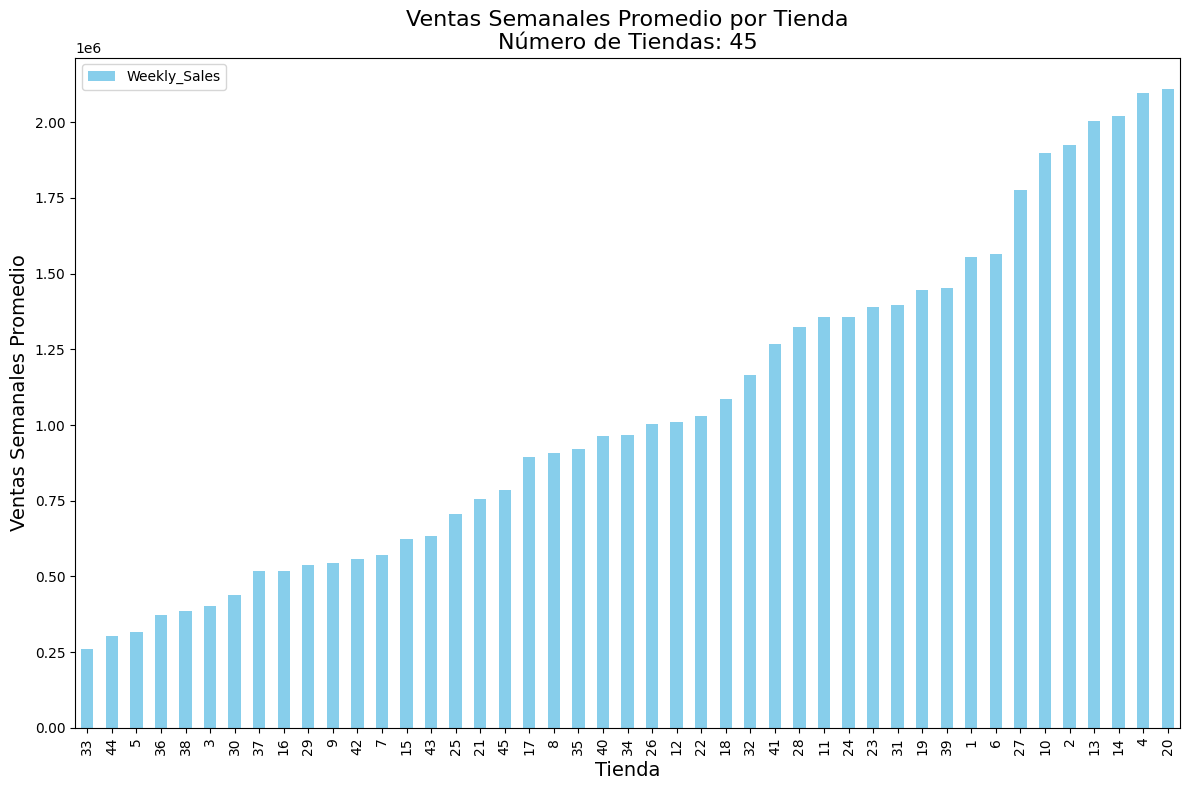

In [43]:
plt.figure(figsize=(12, 8))
ventas_promedio.plot(kind='bar', color='skyblue')

plt.title(f"Ventas Semanales Promedio por Tienda\nNúmero de Tiendas: {numero_tiendas}", fontsize=16)
plt.xlabel('Tienda', fontsize=14)
plt.ylabel('Ventas Semanales Promedio', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

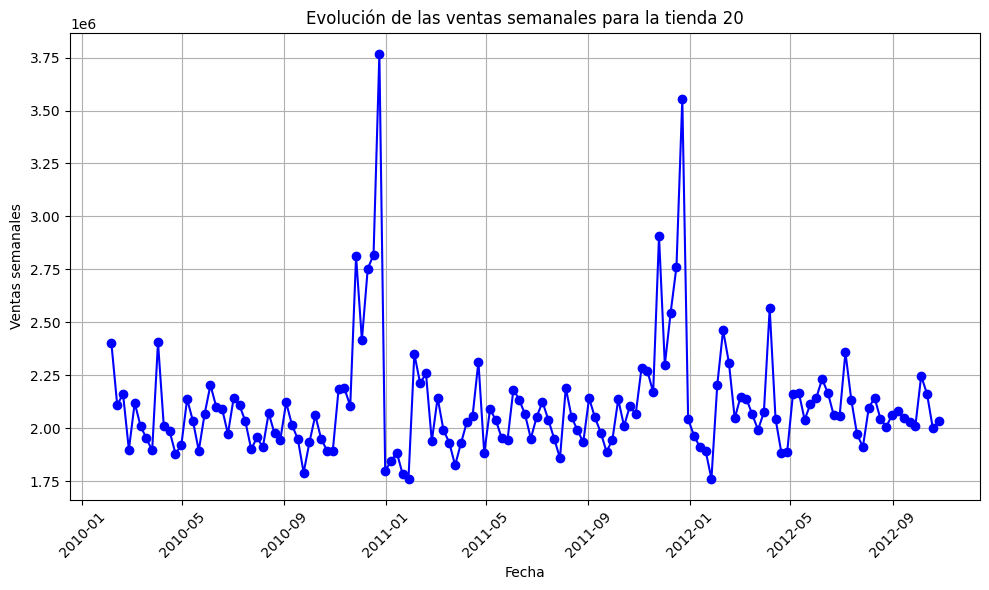

In [45]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

store_sales = df.groupby('Store')['Weekly_Sales'].sum()

top_store = store_sales.idxmax()

df_top_store = df[df['Store'] == top_store]

plt.figure(figsize=(10, 6))
plt.plot(df_top_store['Date'], df_top_store['Weekly_Sales'], marker='o', linestyle='-', color='b')
plt.title(f'Evolución de las ventas semanales para la tienda {top_store}')
plt.xlabel('Fecha')
plt.ylabel('Ventas semanales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

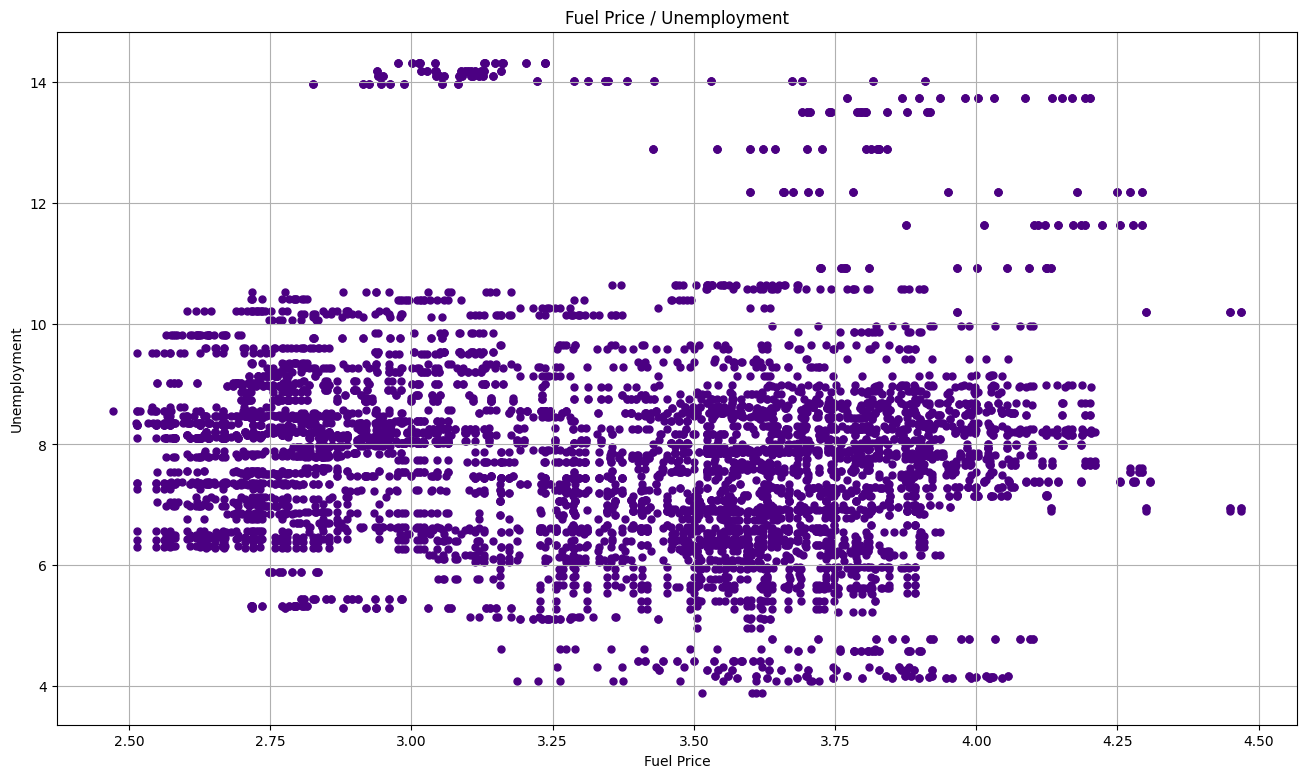

In [119]:
x1 = df["Fuel_Price"]
y1 = df["Unemployment"]


plt.figure(figsize = (16,9))

plt.scatter(x1,y1, c = "indigo", marker = '.', s = 100 )

plt.xlabel("Fuel Price")
plt.ylabel("Unemployment")

plt.title("Fuel Price / Unemployment")

plt.grid(True)
plt.show()

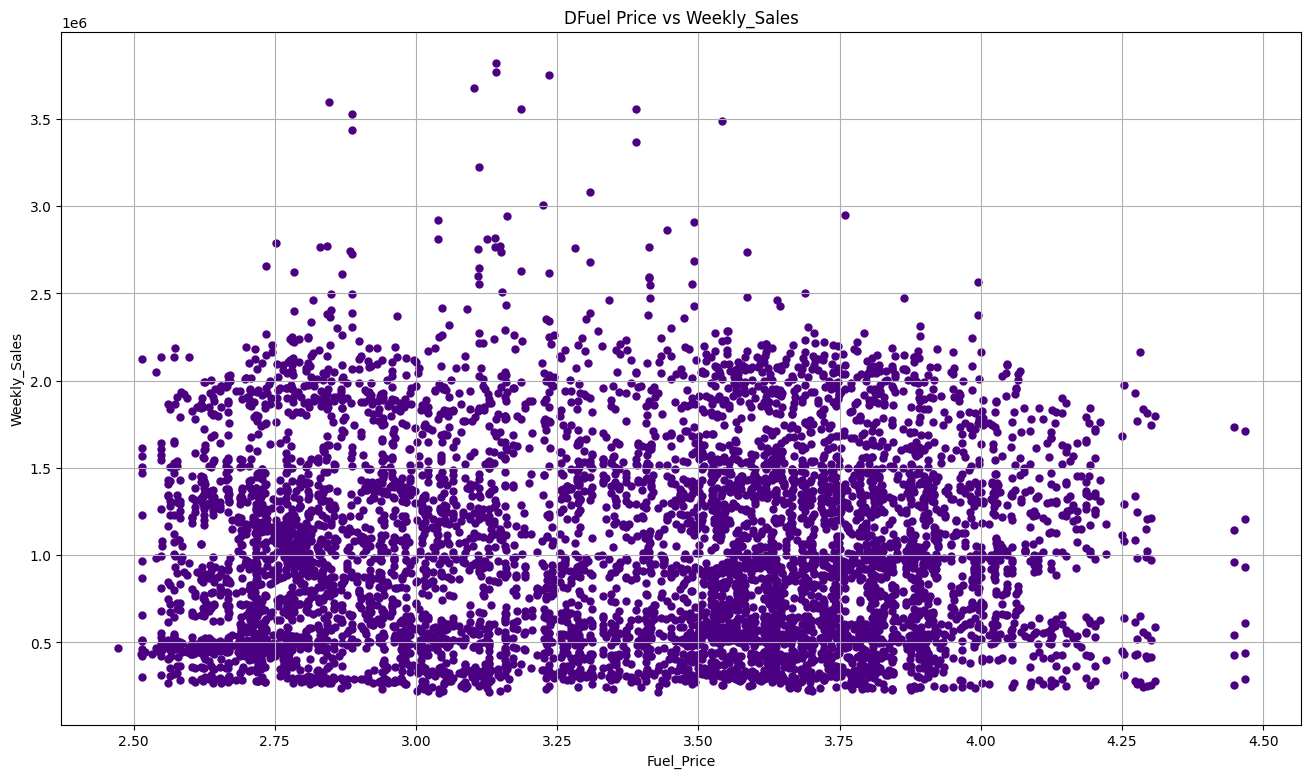

In [121]:
x1 = df["Fuel_Price"]
y1 = df["Weekly_Sales"]


plt.figure(figsize = (16,9))

plt.scatter(x1,y1, c = "indigo", marker = '.', s = 100 )

plt.xlabel("Fuel_Price")
plt.ylabel("Weekly_Sales")

plt.title("DFuel Price vs Weekly_Sales")

plt.grid(True)
plt.show()

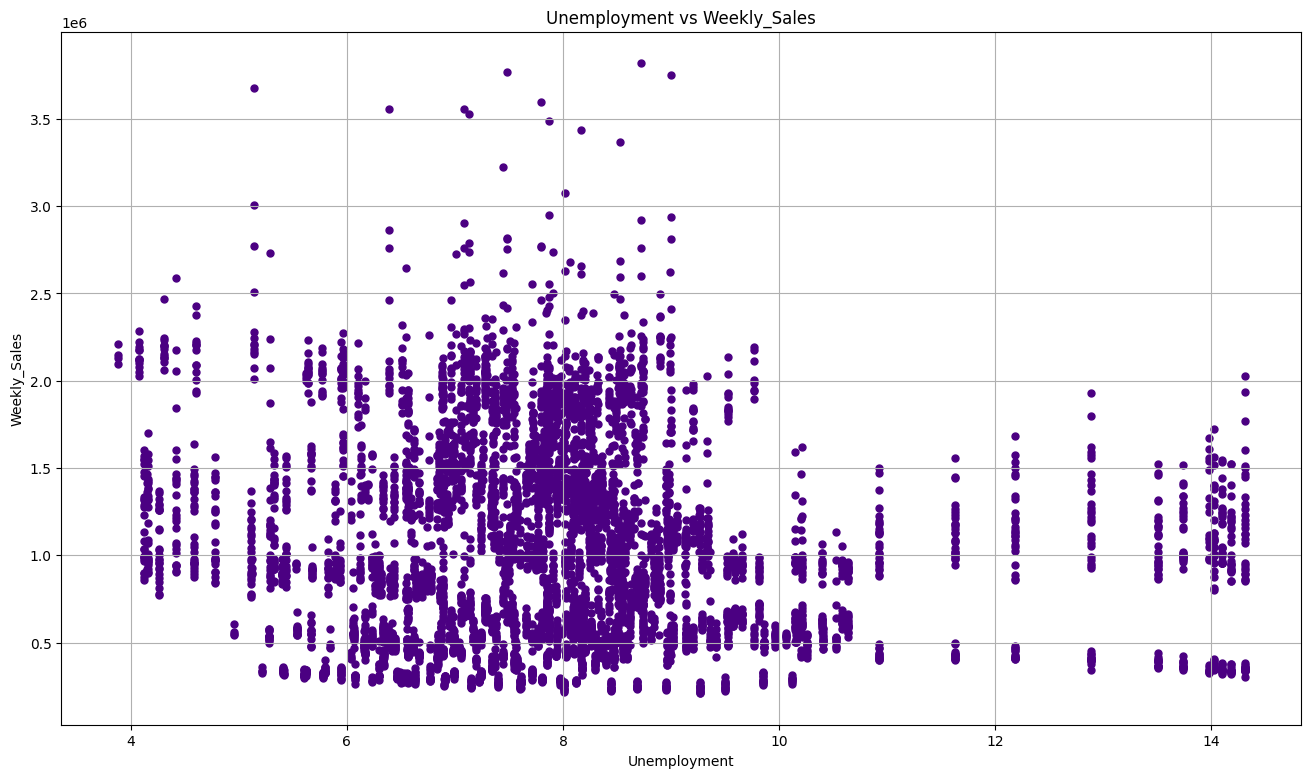

In [123]:
x1 = df["Unemployment"]
y1 = df["Weekly_Sales"]


plt.figure(figsize = (16,9))

plt.scatter(x1,y1, c = "indigo", marker = '.', s = 100 )

plt.xlabel("Unemployment")
plt.ylabel("Weekly_Sales")

plt.title("Unemployment vs Weekly_Sales")

plt.grid(True)
plt.show()

In [52]:
correlacion=df.corr()

In [53]:
print(correlacion)

                 Store      Date  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000 -0.000447     -0.335262      0.000072    -0.022604   
Date         -0.000447  1.000000      0.007105     -0.013216     0.145450   
Weekly_Sales -0.335262  0.007105      1.000000      0.036867    -0.063833   
Holiday_Flag  0.000072 -0.013216      0.036867      1.000000    -0.155103   
Temperature  -0.022604  0.145450     -0.063833     -0.155103     1.000000   
Fuel_Price    0.059694  0.771372      0.009586     -0.078301     0.145049   
CPI          -0.209682  0.077037     -0.072590     -0.002140     0.176911   
Unemployment  0.223490 -0.248355     -0.106148      0.010976     0.101172   

              Fuel_Price       CPI  Unemployment  
Store           0.059694 -0.209682      0.223490  
Date            0.771372  0.077037     -0.248355  
Weekly_Sales    0.009586 -0.072590     -0.106148  
Holiday_Flag   -0.078301 -0.002140      0.010976  
Temperature     0.145049  0.176911      0.101172  


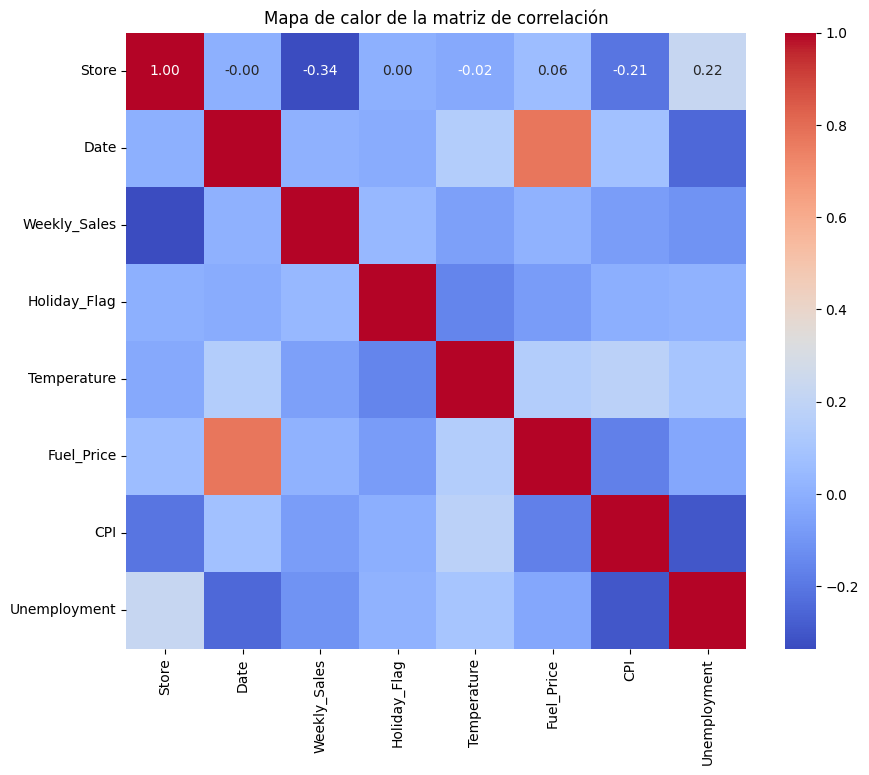

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [55]:
dfFestivo=df[df["Holiday_Flag"]==1]
dfNoFestivo=df[df["Holiday_Flag"]==0]

In [56]:
dfFestivo.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742


In [57]:
dfNoFestivo.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106


In [63]:
import pandas as pd
from scipy import stats

avgFestivo = dfFestivo["Weekly_Sales"].mean()
avgNoFestivo = dfNoFestivo["Weekly_Sales"].mean()

diferencia_promedio = avgFestivo - avgNoFestivo

t_stat, p_value = stats.ttest_ind(dfFestivo["Weekly_Sales"], dfNoFestivo["Weekly_Sales"], equal_var=False)

print(f"Ventas promedio de semanas festivas: {avgFestivo}")
print(f"Ventas promedio de semanas no festivas: {avgNoFestivo}")
print(f"Diferencia promedio de ventas: {diferencia_promedio}")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa entre las ventas de semanas festivas y no festivas.")
else:
    print("No existe una diferencia estadísticamente significativa entre las ventas de semanas festivas y no festivas.")


Ventas promedio de semanas festivas: 1122887.8923555557
Ventas promedio de semanas no festivas: 1041310.3793482621
Diferencia promedio de ventas: 81577.51300729357
Estadístico t: 2.6782781784408503
Valor p: 0.007641793439754634
Existe una diferencia estadísticamente significativa entre las ventas de semanas festivas y no festivas.


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [65]:
from sklearn import linear_model

## Modelo 1: probamos con todas las variables que pueden ser útiles:

In [84]:
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

In [85]:
# División de los datos en train y test
# ==============================================================================
X = df[['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [86]:
# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo.intercept_}")
print(f"Coeficiente: {list(zip(modelo.feature_names_in_, modelo.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: 1731280.3029794805
Coeficiente: [('Holiday_Flag', 115506.07572095165), ('Temperature', -647.3850830706909), ('Fuel_Price', -7284.450786693172), ('CPI', -1709.8309068431163), ('Unemployment', -41934.6370556823)]
Coeficiente de determinación R^2: 0.02504006284835114


In [87]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"El error (rmse) de test es: {rmse}")

Primeras cinco predicciones: [ 994261.09564653 1271689.29174704 1038033.35590555  955577.82322884
 1197965.80505453]
El error (rmse) de test es: 553416.9103748798


## Modelo 2: Probamos solamente variables económicas y la Holiday Flag

Vamos a hacerlo así porque como hemos podido ver antes en el apartado anterior Holiday Flags era muy influyente a la hora de predecir las compras medias semanales.

In [88]:
# División de los datos en train y test
# ==============================================================================
X = df[['Holiday_Flag','Fuel_Price','CPI','Unemployment']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo2 = LinearRegression()
modelo2.fit(X = X_train, y = y_train)

LinearRegression()

In [89]:
# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo2.intercept_}")
print(f"Coeficiente: {list(zip(modelo2.feature_names_in_, modelo2.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo2.score(X, y))

Intercept: 1730773.760934432
Coeficiente: [('Holiday_Flag', 121977.05900905846), ('Fuel_Price', -12049.902415367487), ('CPI', -1788.6788468030884), ('Unemployment', -43144.60853678893)]
Coeficiente de determinación R^2: 0.024552175116330455


In [90]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo2.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"El error (rmse) de test es: {rmse}")

Primeras cinco predicciones: [ 987334.33621975 1254635.51553345 1045059.46240482  968360.7167284
 1188281.40758204]
El error (rmse) de test es: 553660.53110845


## Modelo 3: Probamos con lo que sería ahora exclusivamente variables económicas

In [109]:
# División de los datos en train y test
# ==============================================================================
X = df[['Fuel_Price','CPI','Unemployment']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo3 = LinearRegression()
modelo3.fit(X = X_train, y = y_train)

LinearRegression()

In [110]:
# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo3.intercept_}")
print(f"Coeficiente: {list(zip(modelo3.feature_names_in_, modelo3.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo3.score(X, y))

Intercept: 1759729.96436942
Coeficiente: [('Fuel_Price', -17447.392192277934), ('CPI', -1803.4045010578163), ('Unemployment', -43147.75593201765)]
Coeficiente de determinación R^2: 0.023493445089408316


In [111]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo3.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"El error (rmse) de test es: {rmse}")

Primeras cinco predicciones: [ 993215.02439892 1263144.82150929 1050649.1869104   974185.27159243
 1200336.81963014]
El error (rmse) de test es: 551796.0396125008


## Modelo 4: 

In [114]:
# División de los datos en train y test
# ==============================================================================
X = df[['Holiday_Flag','Unemployment']]
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo4 = LinearRegression()
modelo4.fit(X = X_train, y = y_train)

LinearRegression()

In [115]:
# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo4.intercept_}")
print(f"Coeficiente: {list(zip(modelo4.feature_names_in_, modelo4.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo4.score(X, y))

Intercept: 1293334.3158096015
Coeficiente: [('Holiday_Flag', 124265.23419454218), ('Unemployment', -31798.27919616975)]
Coeficiente de determinación R^2: 0.012383107073575927


In [116]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo4.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"El error (rmse) de test es: {rmse}")

Primeras cinco predicciones: [1068933.85952223 1152785.92176253 1115168.55747346 1052716.73713218
 1085119.18363308]
El error (rmse) de test es: 555332.0573725284


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [128]:
modelo1="modelo1"
modelo1R2=0.02504006284835114
modelo1RMSE=553416.9103748798

modelo2="modelo2"
modelo2R2=0.024552175116330455
modelo2RMSE=553660.53110845

modelo3="modelo3"
modelo3R2=0.023493445089408316
modelo3RMSE=551796.0396125008

modelo4="modelo4"
modelo4R2=0.012383107073575927
modelo4RMSE=555332.0573725284

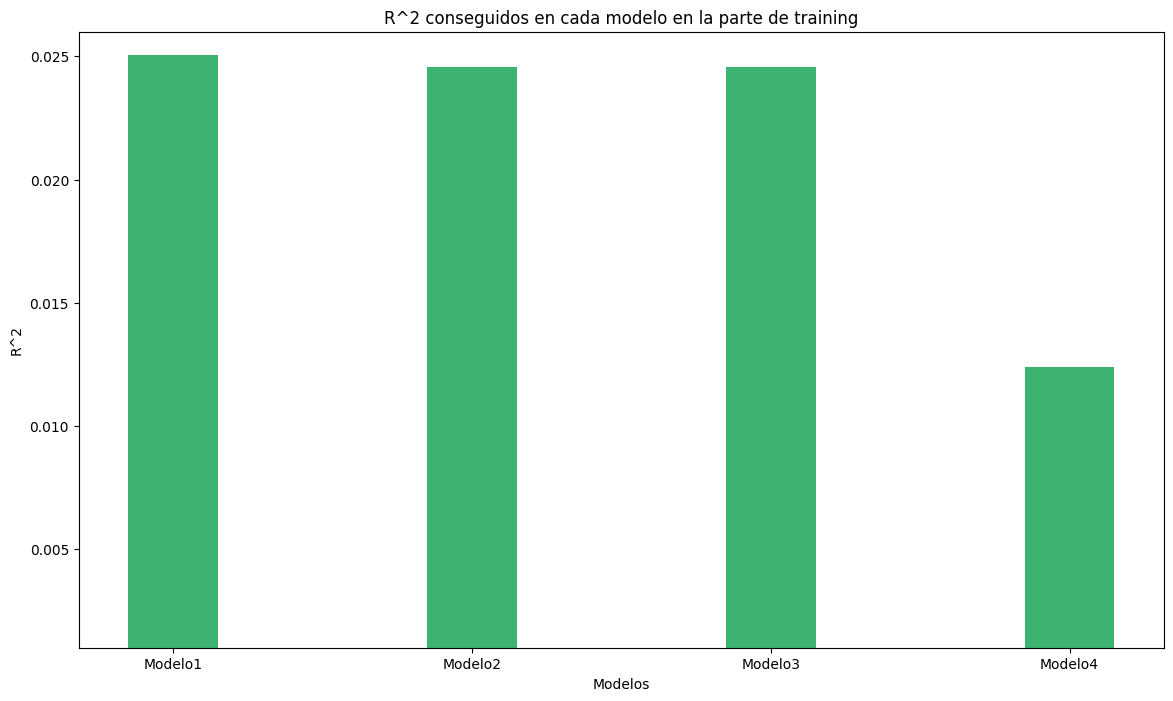

In [129]:
Modelos = ['Modelo1','Modelo2','Modelo3','Modelo4']
R2 = [0.02504006284835114,0.024552175116330455,0.024552175116330455,0.012383107073575927]
RMSE=[553416.9103748798,553660.53110845,553416.9103748798,555332.0573725284]

plt.figure(figsize= (14,8))

plt.bar(Modelos,R2,color = "mediumseagreen",width = 0.3, align = "center")

plt.xlabel("Modelos")
plt.ylabel("R^2")
plt.ylim(0.001,0.026)

plt.title("R^2 conseguidos en cada modelo en la parte de training")

plt.show()

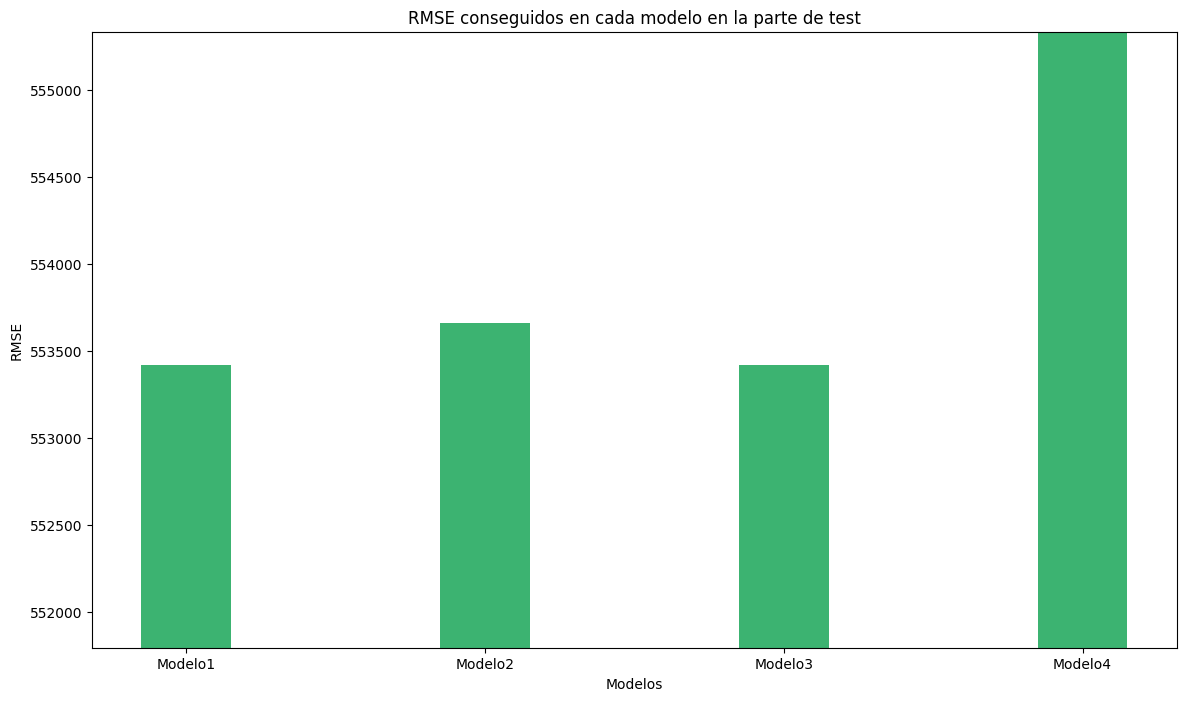

In [130]:
plt.figure(figsize= (14,8))

plt.bar(Modelos,RMSE,color = "mediumseagreen",width = 0.3, align = "center")

plt.xlabel("Modelos")
plt.ylabel("RMSE")
plt.ylim(551796,555332)
plt.title("RMSE conseguidos en cada modelo en la parte de test")

plt.show()

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

En este dataset proporcionado se han dado los datos económicos y de ventas de una cadena de supermercados estadounidense (Walmart). En este dataset se ha podido obserar qeu teníamos todos los datos a excepción de un dato de unemployment que hemos decidido eliminarlo ya que era solamente uno y no presentaba un gran problema para la cantidad de dataset que teníamos. Si no hubiéramos tenido tantos datos, hubiéramos decidido sustituirlo por un valor de al lado o hacer la media entre el anterior. Sin embargo, no ha hecho falta.

Los datos que teníamos eran: 

    1. Store: es el id de la tienda
    2. Fecha: fecha (podemos ver que siempre es por semanas (siempre en viernes)
    3. Weekly_Sales: compras de esa tienda en la semana
    4. Holday_Flag: si es un día festivo o no.
    5. Temperature: temperatura
    6. Fuel_Price: precio de la gasolina
    7. CPI: Consumer Price Index
    8. Unemployment: la tasa de desempleo que existe
    
Hemos podido observar que hay una gran diferencia entre las tiendas que presentan unas ventas muy altas y más bajas tal y como hemos podido observar en el gráfico proporcionado.

Además, cabe destacar que en el gráfico de tiempo compras hemos podido ver que durante los meses de noviembre a diciembre las ventas aumentan en gran cantidad, por lo que la primera recomendación que haría a la empresa es que aumente su abastecimiento durante esos meses.

También, hemos podido observar que realmente las varaibles que se nos han proporcionado no están muy correlacionadas con la de Weekly_sales por lo que yo diría que debería de haber otras que fueran más interesantes. Sin embargo, la que más se correlacionaba era el Unemployment con un -0.106148, lo cual es lógico ya que a mayor tasa de desempleo menos compra la gente.

Después hemos observado que si que existe una diferencia estadísticamente significativa entre las ventas de semanas festivas y no festivas
    
Podemos ver que la diferencia entre los modelos que hemos estudiado no es muy notable. De esta manera hemos decido que el modelo que mejor se ajusta a las necesidades es el más sencillo que hemos hecho. Es decir, el que tiene como varaibles de entrada las económicas (modelo 3): 'Fuel_Price','CPI','Unemployment'.

Cabe destacar que el modelo 4 es también bueno, pero peca de overfitting ya que en el training hay una gran diferencia pero luego a la hora del testing es el mismo